In [41]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
sys.path.append('../../../../nadavp/opt_lev_analysis/lib/')
import bead_util as bu
import configuration as config

In [42]:
# old trap 

## load all data to a list - step_file_objs
step_cal_dir = r'/data/old_trap/20211001/bead1/discharge/recharge_20211013/'
max_file = 500

step_cal_files = []
for root, dirnames, filenames in os.walk(step_cal_dir):
    for filename in fnmatch.filter(filenames, '*' + config.extensions['data']):
        if '_fpga.h5' in filename:
            continue
        step_cal_files.append(os.path.join(root, filename))
step_cal_files.sort(key = bu.find_str)
num_calib_files = len(step_cal_files)
print(num_calib_files)

# Do the step calibration

step_file_objs = []
for filname in step_cal_files[:]:
    try:
        df = bu.DataFile();
        df.load(filname);
        df.load_other_data()
        step_file_objs.append(df);
    except:
        print('***')

175


In [199]:
## run the function on all calibration files
amps = []
for i in range(num_calib_files):
    print(i,'/',len(step_cal_files))
    amps.append(correlation(sigdrive(step_file_objs[i].other_data[5]), step_file_objs[i].pos_data[1] , fsamp=5000, fdrive=139,filt=True,band_width=3)[0])

0 / 175
1 / 175
2 / 175
3 / 175
4 / 175
5 / 175
6 / 175
7 / 175
8 / 175
9 / 175
10 / 175
11 / 175
12 / 175
13 / 175
14 / 175
15 / 175
16 / 175
17 / 175
18 / 175
19 / 175
20 / 175
21 / 175
22 / 175
23 / 175
24 / 175
25 / 175
26 / 175
27 / 175
28 / 175
29 / 175
30 / 175
31 / 175
32 / 175
33 / 175
34 / 175
35 / 175
36 / 175
37 / 175
38 / 175
39 / 175
40 / 175
41 / 175
42 / 175
43 / 175
44 / 175
45 / 175
46 / 175
47 / 175
48 / 175
49 / 175
50 / 175
51 / 175
52 / 175
53 / 175
54 / 175
55 / 175
56 / 175
57 / 175
58 / 175
59 / 175
60 / 175
61 / 175
62 / 175
63 / 175
64 / 175
65 / 175
66 / 175
67 / 175
68 / 175
69 / 175
70 / 175
71 / 175
72 / 175
73 / 175
74 / 175
75 / 175
76 / 175
77 / 175
78 / 175
79 / 175
80 / 175
81 / 175
82 / 175
83 / 175
84 / 175
85 / 175
86 / 175
87 / 175
88 / 175
89 / 175
90 / 175
91 / 175
92 / 175
93 / 175
94 / 175
95 / 175
96 / 175
97 / 175
98 / 175
99 / 175
100 / 175
101 / 175
102 / 175
103 / 175
104 / 175
105 / 175
106 / 175
107 / 175
108 / 175
109 / 175
110 / 175


0.839213139698
175 175
175 175


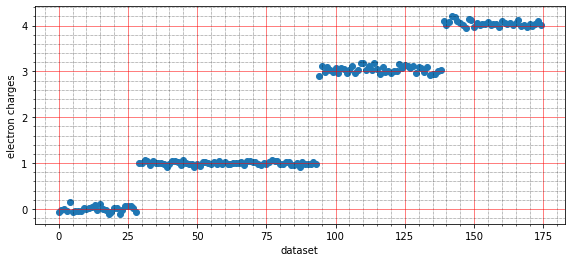

In [200]:
amps = np.array(amps)
scaleY = np.abs(np.mean(amps[150:]))/4 ## scale is taken from the highest step
offset = np.abs(np.mean(amps[0:20]))
print(offset)

_,ax = plt.subplots(figsize=(9.5,4))
xval = range(len(amps))
yval = amps/(scaleY-offset)
print(len(xval),np.size(xval))
print(len(yval),np.size(yval))
ax.scatter(xval ,yval, label='fit phase')

ax.set(xlabel='dataset', ylabel='electron charges', xlim=(None,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
from matplotlib.ticker import MaxNLocator

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [201]:
drive_freq = 139
print("Scale is ", scaleY)
bb = step_file_objs[-1]
b, a = signal.butter(3, [2.*(drive_freq-band_width/2.)/fsamp, 2.*(drive_freq+band_width/2.)/fsamp ], btype = 'bandpass')
xx2 = signal.filtfilt(b, a, bb.other_data[5])
voltage_calib = np.std(xx2)*np.sqrt(2)*100
print("voltage_calib: ", voltage_calib)

Scale is  100.73759443
voltage_calib:  23.2924528872


In [25]:
len(amps/scaleY)

175